In [4]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression
!unzip salary-dataset-simple-linear-regression.zip

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 939kB/s]
Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [9]:
import pandas as pd

data = pd.read_csv('Salary_dataset.csv', header=0)
print(data)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [10]:
x = data.iloc[:,1].values
y = data.iloc[:,2].values

print(x)
print(y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [11]:
import numpy as np

comatrix = np.corrcoef(x, y)
coefficient = comatrix[0,1]
print(comatrix)
print(coefficient)

[[1.         0.97824162]
 [0.97824162 1.        ]]
0.9782416184887599


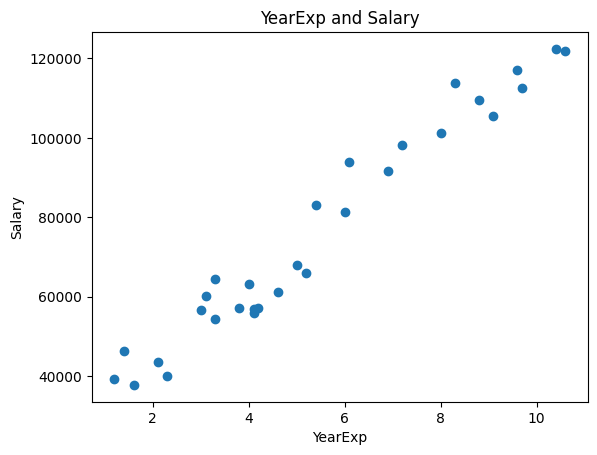

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('YearExp')
plt.ylabel('Salary')
plt.title('YearExp and Salary')
plt.grid(False)
plt.show()

In [15]:
import torch

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1,1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

print(x_tensor)

tensor([[ 1.2000],
        [ 1.4000],
        [ 1.6000],
        [ 2.1000],
        [ 2.3000],
        [ 3.0000],
        [ 3.1000],
        [ 3.3000],
        [ 3.3000],
        [ 3.8000],
        [ 4.0000],
        [ 4.1000],
        [ 4.1000],
        [ 4.2000],
        [ 4.6000],
        [ 5.0000],
        [ 5.2000],
        [ 5.4000],
        [ 6.0000],
        [ 6.1000],
        [ 6.9000],
        [ 7.2000],
        [ 8.0000],
        [ 8.3000],
        [ 8.8000],
        [ 9.1000],
        [ 9.6000],
        [ 9.7000],
        [10.4000],
        [10.6000]])


In [19]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    y = self.linear(x_tensor)
    return y

In [20]:
model = LinearRegressionModel()

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
x_tensor = x_tensor.to(device)
y_tensor = y_tensor.to(device)